# Predicción de Vuelos

## Importar las librerias

In [1]:
# Manejo de datos
import pandas as pd

# Numéricos 
import numpy as np

# Gráficos
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Análisis de datos 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Modelado
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


## Importar el dataset

In [2]:

df=pd.read_excel('dataset/Data_Train.xlsx')

#Mostramos los 5 primeros datos
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# mostramos el tamaño del dataframe
df.shape

(10683, 11)

Tenemos 10.683 filas y 11 columnas

In [4]:
#Información acerca de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Tenemos 10.683 filas de datos enumeradas del 0 al 10.682. Podemos observar que en la columna "Route" y "Total_Stops" nos falta un dato. La única columna con valor entero (datos cuantitativo nominal) y de la que podramos sacar estadísticas descriptivas es "Price", las demás columnas son datos cualitativos.

In [5]:
# verificamos que tenemos datos faltantes
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

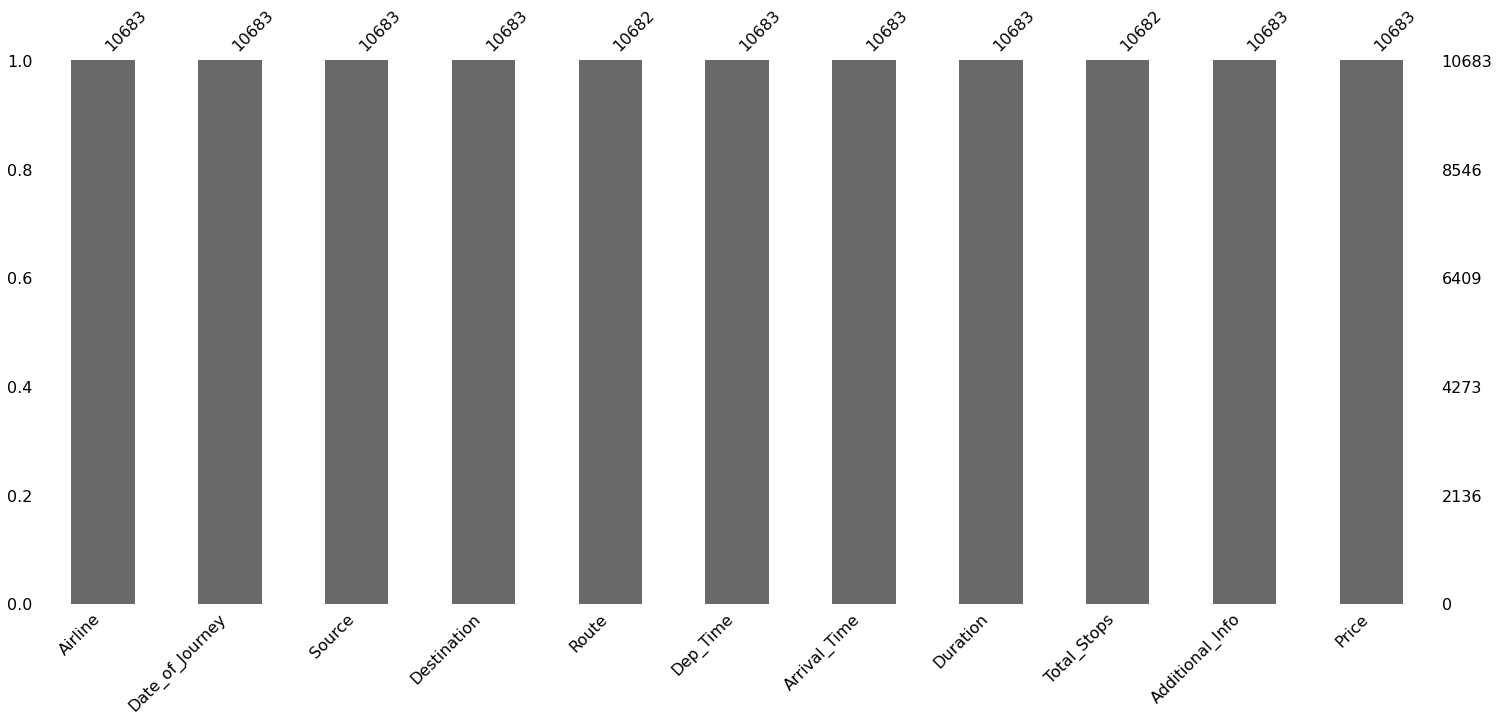

In [6]:

msno.bar(df)
plt.show()

In [7]:
#eliminamos estos valores faltantes dado el gran tamaño del dataset
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
# estadísticas principales 
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Data cleaning

In [10]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

El tipo de datos de "Date_of_Journey", "Arrival_Time" y "Dep_Time" es de tipo objeto se tienen que convertir en fecha y tiempo para hacer las predicciones

In [11]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [12]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

C:\Users\elena\AppData\Local\Temp\ipykernel_14628\3204248598.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col]=pd.to_datetime(df[col])


In [14]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Voy a extraer el dia y mes de 'Date_of_Journey' y lo guardaré en dos columnas
Luego eliminaré la columna 'Date_oj_Journey' dado que no la usaré


In [15]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey', axis=1, inplace=True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-08-31 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-31 05:50:00,2024-08-31 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-31 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-08-31 18:05:00,2024-08-31 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-08-31 16:50:00,2024-08-31 21:35:00,4h 45m,1 stop,No info,13302,3,1


Ahora extraeré la hora y los minutos que están en las columnas 'Arrival_Time' y 'Dept_Time' y los guardaré en columnas nuevas y eliminaré estas columnas

In [17]:
#Creo funciones para extraer hora y minutos y otra para eliminar las columnas
def extract_hour(data, col):
    data[col+'_hour']=data[col].dt.hour
def extract_min(data, col):
    data[col+'_min']=data[col].dt.minute
def drop_col(data,col):
    data.drop(col, axis=1, inplace=True)
    

In [18]:
#voy llamando a las funciones anteriormente definidas
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
drop_col(df, 'Dep_Time')

extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_col(df, 'Arrival_Time')

In [19]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Ahora aplicare pre-processing en la columna Duration,  separando la duracion en horas y minutos

In [20]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:#verifico si duracion contiene solo horas
            duration[i]=duration[i] + ' 0m' # si no tiene minutos añado 0m
        else:
            duration[i]= '0h '+ duration[i] # si no tiene horas añado 0h
        

In [21]:
df['Duration']=duration

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [23]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minutes(x):
    return x.split(' ')[1][0:-1]

In [24]:
#Creo dos nuevas columnas con las duraciones en horas y otra de la duracion en minutos 
df['dur_hour']=df['Duration'].apply(hour)
df['dur_min']=df['Duration'].apply(minutes)

In [25]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [26]:
#borro la columna 'Duration'
drop_col(df,'Duration')

In [27]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [28]:
#cambio el tipo de dato para estas nuevas columnas que deben de ser entero
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [29]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

Las variables categóricas son

In [30]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Las variables cualitativas son 

In [31]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col


['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

## Transformacion de las variables categóricas

Podemos transformar las variables categóricas en
- Nominales : Datos no tiene orden, los transformaremos con hot encoding

- Ordinales: Datos tienen orden, las transformaremos labelEncoder

In [32]:
categorical =df[column]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [33]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Vamos a ver como se comporta 'Airline' con 'Price'

<AxesSubplot:xlabel='Airline', ylabel='Price'>

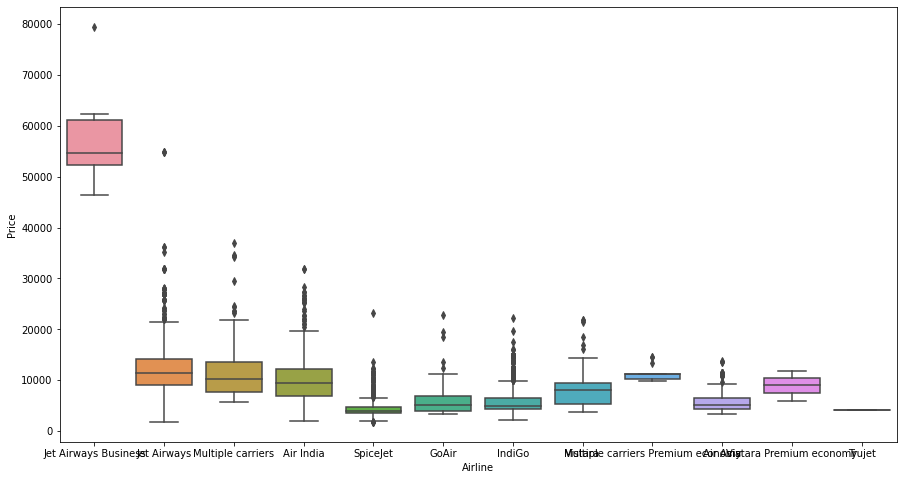

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

Podemos observar que Jet Airways Busines tiene los precios más altos, las demás aerolíneas tienen precios similares de media.

## Vamos a ver como se comporta 'Total_Stops' con 'Price'

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

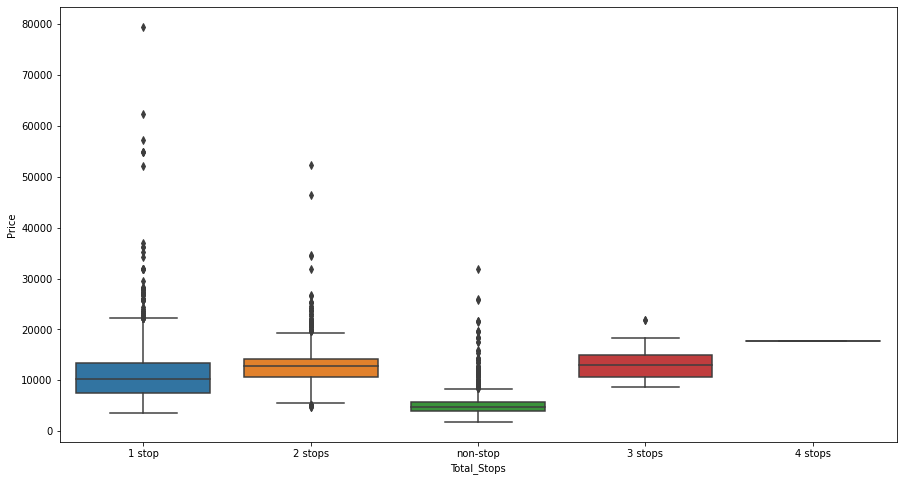

In [35]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

Los precios más bajos en media son de los que son vuelos directos aunque tiene valores atípicos

In [36]:
# Como Airline son datos  categóricos nominales  los transformaré con OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [37]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [38]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

## Comparo 'Source' con 'Price'

<Figure size 1080x1080 with 0 Axes>

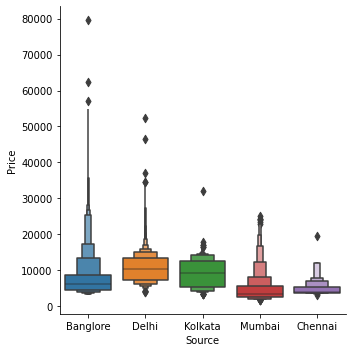

In [39]:

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

C:\Users\elena\AppData\Local\Temp\ipykernel_14628\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

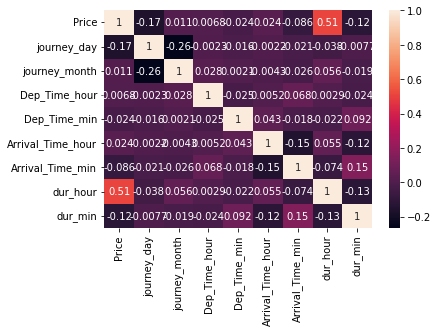

In [40]:
sns.heatmap(df.corr(),annot=True)

In [41]:
#codifico la columna Source que también es categórico nomninal
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [42]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

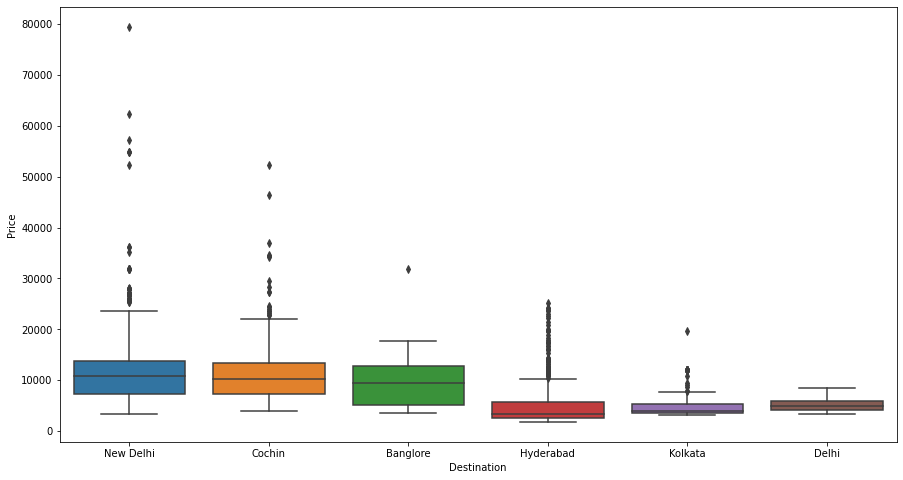

In [43]:
#Ahora quiero ver como se comporta los destinos y el precio 

plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [44]:
#codifico la columna Destination que es categórica nominal
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [45]:
# Ahora separaré la columna Route en cinco columnas separando así las rutas (tenemos hasta stops)
categorical['Route'].value_counts()


DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [46]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

C:\Users\elena\AppData\Local\Temp\ipykernel_14628\4124669443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route1']=categorical['Route'].str.split('→').str[0]
C:\Users\elena\AppData\Local\Temp\ipykernel_14628\4124669443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route2']=categorical['Route'].str.split('→').str[1]
C:\Users\elena\AppData\Local\Temp\ipykernel_14628\4124669443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [47]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [48]:
drop_col(categorical,'Route')

C:\Users\elena\AppData\Local\Temp\ipykernel_14628\323793797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis=1, inplace=True)


In [49]:
categorical.isnull().sum()


Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

Tenemos dastos vacíos en las columnas donde no hay tantas paradas por lo tanto cambiaremos esos valores nulos por None para poder trabajar 
estas columnas

In [50]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [51]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\elena\AppData\Local\Temp\ipykernel_14628\1890183594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None',inplace=True)


In [52]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [53]:
for i in categorical.columns:
    print('{} tiene un  total {} de categorias'.format(i,len(categorical[i].value_counts())))

Airline tiene un  total 12 de categorias
Source tiene un  total 5 de categorias
Destination tiene un  total 6 de categorias
Total_Stops tiene un  total 5 de categorias
Additional_Info tiene un  total 10 de categorias
Route1 tiene un  total 5 de categorias
Route2 tiene un  total 45 de categorias
Route3 tiene un  total 30 de categorias
Route4 tiene un  total 14 de categorias
Route5 tiene un  total 6 de categorias


<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='Price'>

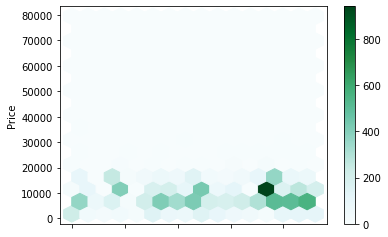

In [54]:
# Vamos a ver como se comporta la columna "Arrival_Time_hour" con "Price"
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

Como era de esperar los vuelos más largos son los más caros 

In [55]:
# Vamos a codificar estas variables de rutas nuevas creadas a partir 
#de la columna Route inicial en variables cualitativas ordinales

encoder = LabelEncoder()

In [56]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\elena\AppData\Local\Temp\ipykernel_14628\1401747013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [57]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [58]:
#Elimino la columna Aditional_Info dado que no es necesaria para el análisis
drop_col(categorical,'Additional_Info')

C:\Users\elena\AppData\Local\Temp\ipykernel_14628\323793797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis=1, inplace=True)


In [59]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [60]:
# Codificamos Total stops para poder trabajar con ella 
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

C:\Users\elena\AppData\Local\Temp\ipykernel_14628\3731229226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [61]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [62]:
# Elimino del dataframe categorical, las columnas Source ,Destination y Airline dado que ya las tenemos codificadas
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

C:\Users\elena\AppData\Local\Temp\ipykernel_14628\323793797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis=1, inplace=True)
C:\Users\elena\AppData\Local\Temp\ipykernel_14628\323793797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis=1, inplace=True)
C:\Users\elena\AppData\Local\Temp\ipykernel_14628\323793797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis=1, inplac

<AxesSubplot:>

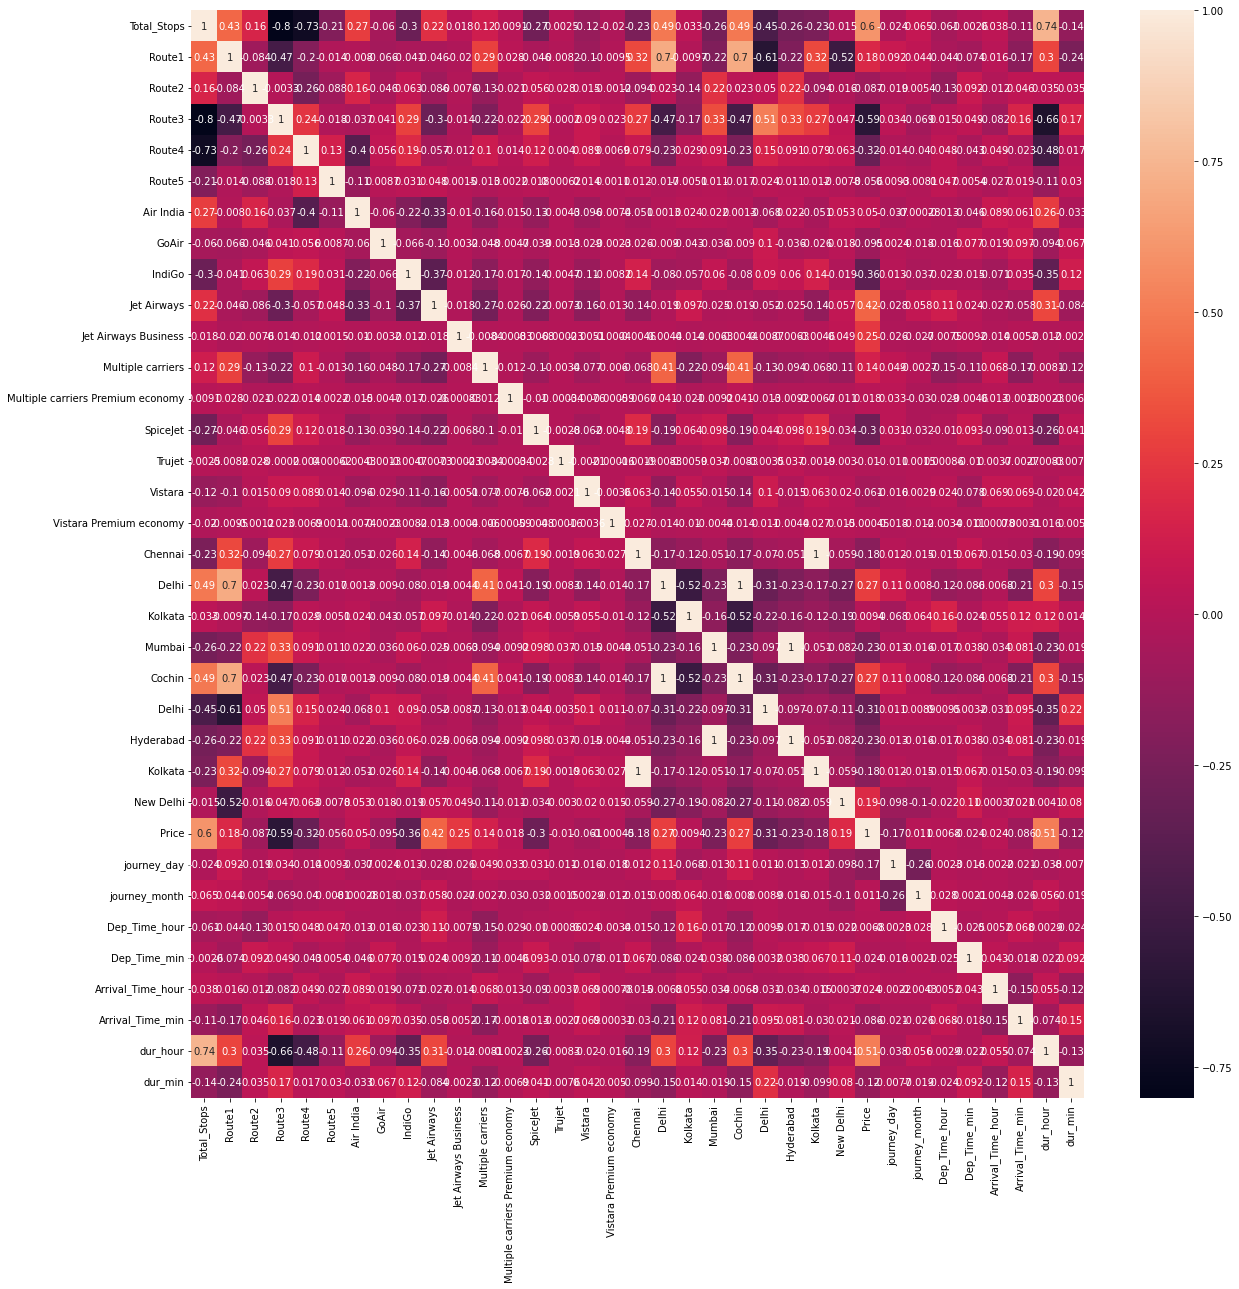

In [63]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True, ax=ax)

In [64]:
final_df.head()
columnas=final_df.columns.values
print(columnas)

['Total_Stops' 'Route1' 'Route2' 'Route3' 'Route4' 'Route5' 'Air India'
 'GoAir' 'IndiGo' 'Jet Airways' 'Jet Airways Business' 'Multiple carriers'
 'Multiple carriers Premium economy' 'SpiceJet' 'Trujet' 'Vistara'
 'Vistara Premium economy' 'Chennai' 'Delhi' 'Kolkata' 'Mumbai' 'Cochin'
 'Delhi' 'Hyderabad' 'Kolkata' 'New Delhi' 'Price' 'journey_day'
 'journey_month' 'Dep_Time_hour' 'Dep_Time_min' 'Arrival_Time_hour'
 'Arrival_Time_min' 'dur_hour' 'dur_min']


In [65]:
final_df.describe()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,2.019378,11.897959,13.232166,11.792080,4.983056,0.163921,0.018161,0.192192,0.360326,...,0.087250,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,0.675229,1.206239,8.006427,11.302632,2.948124,0.263913,0.370221,0.133541,0.394042,0.480117,...,0.282214,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,4.000000,13.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,2.000000,8.000000,6.000000,13.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,3.000000,14.000000,29.000000,13.000000,5.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,4.000000,44.000000,29.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [66]:
#Inicializar el escalador
scaler = MinMaxScaler()

#Normalizar los datos
final_df_normalizado = scaler.fit_transform(final_df)

#Mostrar los registros normalizados
final_df=pd.DataFrame( final_df_normalizado, columns=columnas )
final_df

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0.00,0.00,0.295455,1.000000,1.000000,1.0,0.0,0.0,1.0,0.0,...,1.0,0.027497,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091
1,0.50,0.50,0.568182,0.034483,0.230769,1.0,1.0,0.0,0.0,0.0,...,0.0,0.075920,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545
2,0.50,0.75,0.727273,0.137931,0.384615,1.0,0.0,0.0,0.0,1.0,...,0.0,0.155917,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000
3,0.25,0.50,0.772727,0.103448,1.000000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.057348,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545
4,0.25,0.00,0.772727,0.275862,1.000000,1.0,0.0,0.0,1.0,0.0,...,1.0,0.148457,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0.00,0.50,0.113636,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.030198,0.041667,0.727273,0.826087,1.000000,0.956522,0.454545,0.042553,0.545455
10678,0.00,0.50,0.113636,1.000000,1.000000,1.0,1.0,0.0,0.0,0.0,...,0.0,0.030687,1.000000,0.272727,0.869565,0.818182,1.000000,0.363636,0.042553,0.636364
10679,0.00,0.00,0.295455,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.070351,1.000000,0.272727,0.347826,0.363636,0.478261,0.363636,0.063830,0.000000
10680,0.00,0.00,0.295455,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,0.140046,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818,0.042553,0.727273


# Después del procesado, los datos están listos para modelarlos

In [67]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0.00,0.00,0.295455,1.000000,1.000000,1.0,0.0,0.0,1.0,0.0,...,1.0,0.027497,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091
1,0.50,0.50,0.568182,0.034483,0.230769,1.0,1.0,0.0,0.0,0.0,...,0.0,0.075920,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545
2,0.50,0.75,0.727273,0.137931,0.384615,1.0,0.0,0.0,0.0,1.0,...,0.0,0.155917,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000
3,0.25,0.50,0.772727,0.103448,1.000000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.057348,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545
4,0.25,0.00,0.772727,0.275862,1.000000,1.0,0.0,0.0,1.0,0.0,...,1.0,0.148457,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182


In [68]:
pd.set_option('display.max_columns',33)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0.00,0.00,0.295455,1.000000,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.027497,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091
1,0.50,0.50,0.568182,0.034483,0.230769,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075920,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545
2,0.50,0.75,0.727273,0.137931,0.384615,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.155917,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000
3,0.25,0.50,0.772727,0.103448,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057348,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545
4,0.25,0.00,0.772727,0.275862,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.148457,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182


## Revisamos los outliers

In [69]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.histplot(data[col],ax=ax1) 
    sns.boxplot(data[col],ax=ax2)

c:\users\elena\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


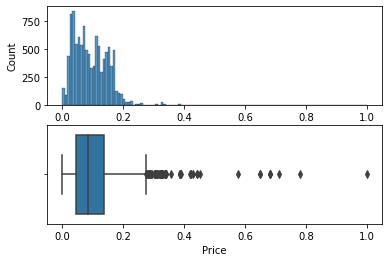

In [70]:
plot(final_df,'Price')

Hay outliers en 'Price' , así que los reemplazaremos con la mediana

In [71]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

c:\users\elena\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


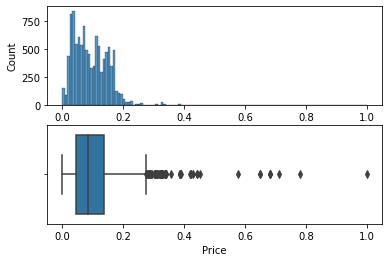

In [72]:
plot(final_df,'Price')

## Separamos el dataset en X e Y columnas

In [73]:
#Como lo que queremos es predecir el precio, está será nuestra y
X=final_df.drop('Price',axis=1)
y=df['Price']

In [74]:
from sklearn.feature_selection import mutual_info_classif

In [75]:
mutual_info_classif(X,y)

array([2.13957   , 1.99376929, 2.99663495, 2.58180872, 2.00530333,
       1.79912929, 0.78340779, 0.10351252, 0.67266824, 0.92756035,
       0.        , 0.58232531, 0.00714473, 0.33018927, 0.        ,
       0.22405357, 0.02522883, 0.17483117, 1.54992382, 0.86625379,
       0.28298425, 1.54701958, 0.39617365, 0.28225816, 0.16313046,
       0.37829724, 1.07111365, 1.06182105, 1.51365537, 1.27564773,
       1.90059731, 1.62775307, 1.75359648, 1.13752553])

In [76]:
#Sacamos los "pesos" de las columnas
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.152897
Route1,2.056337
Route2,2.990700
Route3,2.586368
Route4,1.964858
Route5,1.767293
Air India,0.758807
GoAir,0.109578
IndiGo,0.668948
Jet Airways,0.933655


In [77]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.990700
Route3,2.586368
Total_Stops,2.152897
Route1,2.056337
Route4,1.964858
Arrival_Time_hour,1.915060
dur_hour,1.783160
Route5,1.767293
Arrival_Time_min,1.632066
Cochin,1.574651


# Modelos

In [78]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
#separo los datos para las pruebas
X_train1,X_prueba,y_train1,y_prueba = train_test_split(X,y,test_size=0.05,random_state=786)
#Separo los datos para realizar los modelos

X_train,X_test,y_train,y_test = train_test_split(X_train1,y_train1,test_size=0.20,random_state=123)


In [79]:
print("X_train", len(X_train))
print("X_test", len(X_test))
print("X_prueba", len(X_prueba))

X_train 8117
X_test 2030
X_prueba 535


In [80]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.histplot(y_test-predictions)    

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor


Model is: RandomForestRegressor()
Training score: 0.9518442286590696
Predictions are: [ 4946.67       4332.58      10719.555     ... 12575.0905    11592.677
  2006.7832381]


r2 score is: 0.8352318662055416
MAE:1147.414426351659
MSE:3666760.008501499
RMSE:1914.878588449278


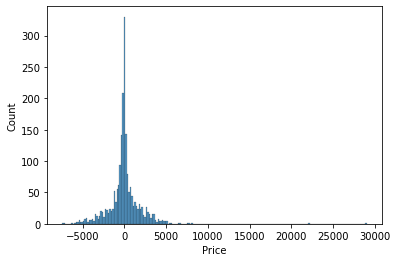

In [82]:
predict(RandomForestRegressor())

From the graph,it is clear that we predicted 83,32% correctly.

Model is: LogisticRegression()


c:\users\elena\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.3145250708389799
Predictions are: [ 4409  3943 10151 ... 13377 10262  2017]


r2 score is: 0.5375594642617759
MAE:1835.9418719211822
MSE:10291179.633497536
RMSE:3207.986850580522


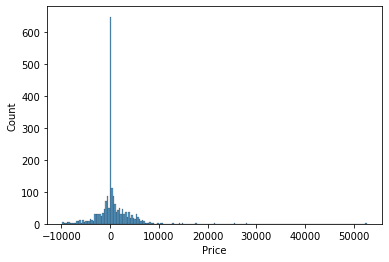

In [83]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.8074769774259778
Predictions are: [ 4564.   4344.4  9870.2 ...  9567.6 12042.8  2143.4]


r2 score is: 0.7261966614775397
MAE:1518.195369458128
MSE:6093236.044906404
RMSE:2468.448104560111


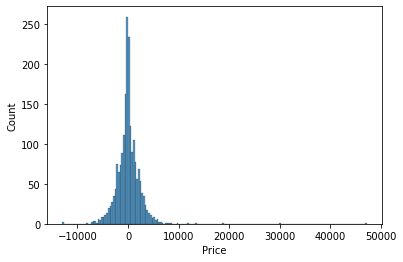

In [84]:
predict(KNeighborsRegressor())


Model is: DecisionTreeRegressor()
Training score: 0.9711544864808386
Predictions are: [ 5989.  4423.  8366. ... 13377. 10262.  2017.]


r2 score is: 0.7358274854032327
MAE:1333.9803284072248
MSE:5878911.10715052
RMSE:2424.6465942793643


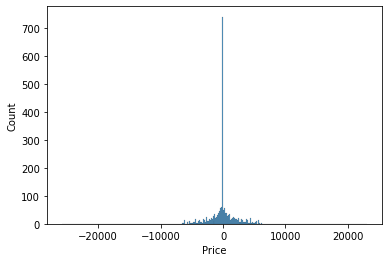

In [85]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.07037404612204323
Predictions are: [7995.36114404 7606.97327808 8393.48046418 ... 8474.3278232  8847.25680558
 7813.96671889]


r2 score is: 0.0728629267706592
MAE:3354.9573892899143
MSE:20632564.4663629
RMSE:4542.30827513533


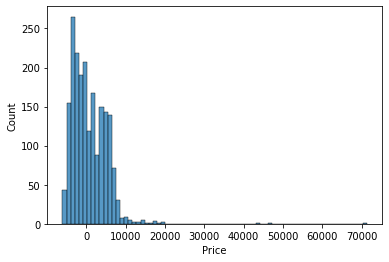

In [86]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.8006729534835295
Predictions are: [ 4624.46384359  4616.1600259  11930.85119909 ... 10324.5576977
 11595.4349471   2592.47265071]


r2 score is: 0.8023912577372887
MAE:1462.9375464476586
MSE:4397596.894330786
RMSE:2097.0448002679354


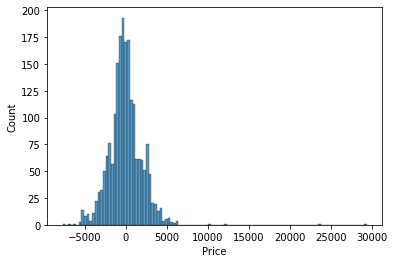

In [87]:
predict(GradientBoostingRegressor())

Model is: RandomForestRegressor()
Training score: 0.9518442286590696
Predictions are: [ 4946.67       4332.58      10719.555     ... 12575.0905    11592.677
  2006.7832381]


r2 score is: 0.8352318662055416
MAE:1147.414426351659
MSE:3666760.008501499
RMSE:1914.878588449278

# Mejoramos el modelo

In [88]:
from sklearn.model_selection import RandomizedSearchCV


In [89]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [90]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\users\elena\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 220, 'max_features': 'auto', 'max_depth': 15}

In [91]:
# best parameter
rf_random.best_params_

{'n_estimators': 220, 'max_features': 'auto', 'max_depth': 15}

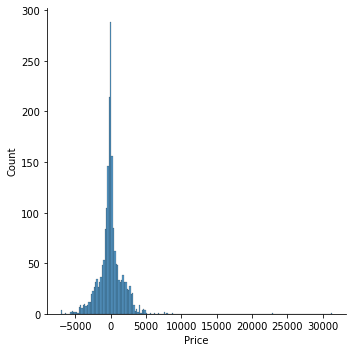

In [92]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [93]:
r2_score(y_test,prediction)

0.8478292253923956

Despues de mejorar el modelo accuracy aumenta!

In [94]:
#Guardamos el modelo 

import joblib
nombre='modelos/RandomForestRegresor.pkl'
joblib.dump(rf,nombre)

['modelos/RandomForestRegresor.pkl']

## Prueba del modelo

In [95]:
from pickle import load
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [96]:
modelo_cargado=load(open('modelos/RandomForestRegresor.pkl', 'rb'))

In [97]:
modelo_cargado.fit(X_train, y_train)
prediccion_nuevos=modelo_cargado.predict(X_prueba)

prediccion_nuevos

array([ 4418.57      , 13360.28633333, 11700.7385    ,  4883.32      ,
        7832.        , 27600.87      ,  7042.67083333,  3868.84      ,
        3712.846     ,  7731.59      ,  7201.02      ,  4812.4       ,
        3596.46      , 13517.908     ,  8078.39      ,  9581.23333333,
       11830.44166667, 12951.6       , 11087.82      ,  5850.5       ,
        5348.4       , 10870.39416667,  5277.        ,  5307.94      ,
        5839.15      , 11255.95      ,  4226.        ,  4306.36      ,
       14351.84833333, 12835.4827381 ,  9925.98444444, 11266.41      ,
       13640.33447619, 18990.64666667,  8637.12      , 11422.60333333,
        8488.61      , 12331.53      , 11717.91583333, 12767.63      ,
        9354.62333333,  9387.45      ,  5107.46166667,  4804.        ,
        4049.        , 10133.13      ,  5037.84228571,  5443.07916667,
       12141.639     , 13402.40466667, 12622.235     ,  6913.5275    ,
        7178.13      , 12876.66      ,  9107.87      , 12806.44666667,
      

In [98]:
y_prueba=y_prueba.to_numpy()

In [99]:
y_prueba

array([ 4174, 10844, 14714,  4823,  7832, 22153,  6297,  3841,  3625,
        7670,  6442,  4804,  3419, 13904,  8574, 13731, 12284, 12856,
       11966,  5618,  5277, 10844,  5277,  6094,  5583, 11087,  4226,
        3943, 14300, 14151, 11467, 12402, 11848, 15812,  8005, 12284,
        8085, 12373, 10539, 14151,  8728,  9646,  5615,  4804,  4049,
        9929,  3873,  7229, 10368, 11087, 12389,  5198,  7503, 12942,
        9187, 12192, 11622, 13302, 13797, 12646, 15077, 14817, 13941,
        6037, 12723, 15147,  7931,  5092, 10651,  5198, 10368,  5636,
        4377, 12898, 10262,  4239,  3873,  3100, 12032,  4049, 10703,
        7480, 10844, 13817,  8529, 10703, 13838,  8586, 10197,  5989,
        5678,  4804, 17261, 12681,  5761,  3858,  7740, 13377,  2017,
        3841,  7174, 12898, 13817, 13292,  7064, 15974, 13759, 13292,
        7416,  6327, 13364, 14388,  9564,  6094, 12127,  8907, 13029,
        6442, 14086,  4077,  4823,  6979,  3873,  3597, 16914, 14231,
        6961, 12173,